In [1]:
library(tidyverse)
library(ggplot2)
library(MatchIt)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Loading Data
data <- read_csv("../datahwk2.1/final-data.csv")
data2018 <- read_csv("../datahwk2.1/data-2018.csv")

Rows: 449046 Columns: 69
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): contractid, state, county, org_type, plan_type, partd, snp, eghp, ...
dbl (52): planid, fips, year.x, n_nonmiss, avg_enrollment, sd_enrollment, mi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 85866 Columns: 62
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): contractid, state, county, org_type, plan_type, partd, snp, eghp, ...
dbl (46): planid, fips, year.x, n_nonmiss, avg_enrollment, sd_enrollment, mi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


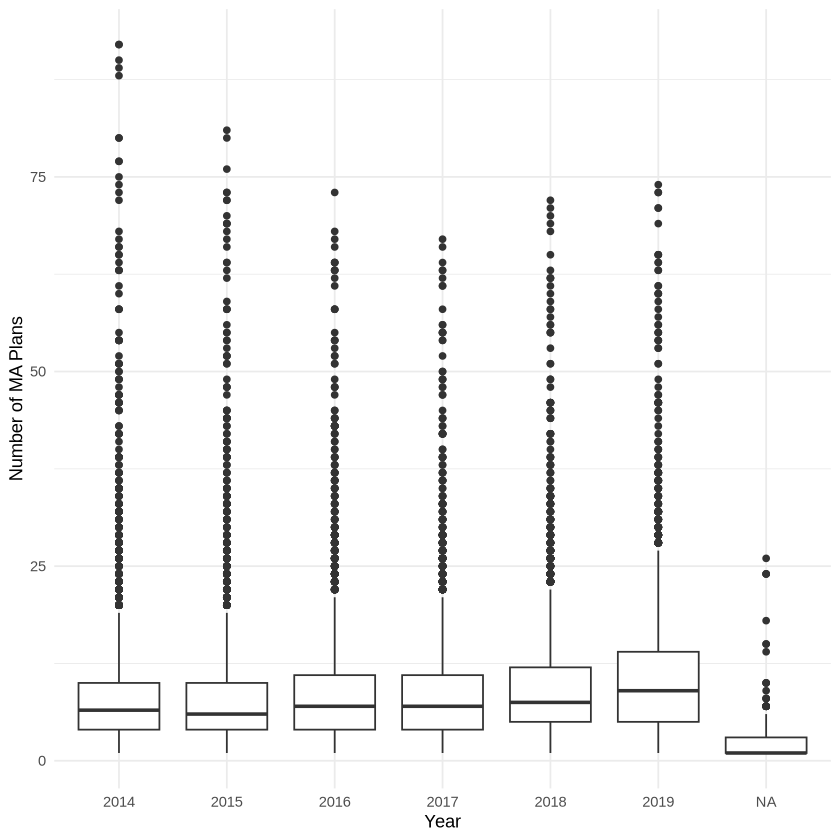

In [4]:
# 1. Filter plans: remove SNPs, 800-series, and prescription drug only
filtered_data <- data %>%
  filter(
    snp != "Yes",        
    !grepl("^8", planid),
    plan_type != "PDP"
  )

# Box and whisker plot of plan counts by count over time
county_plan_counts <- filtered_data %>%
  distinct(contractid, fips, year) %>%
  count(fips, year, name = "n_plans")

ggplot(county_plan_counts, aes(x = factor(year), y = n_plans)) +
  geom_boxplot() +
  labs(
    x = "Year",
    y = "Number of MA Plans") +
  theme_minimal()

In [5]:
# Frequency histograms for 2014 vs 2018
# remove rows with NA
bids <- filtered_data %>%
    filter(!is.na(bid))

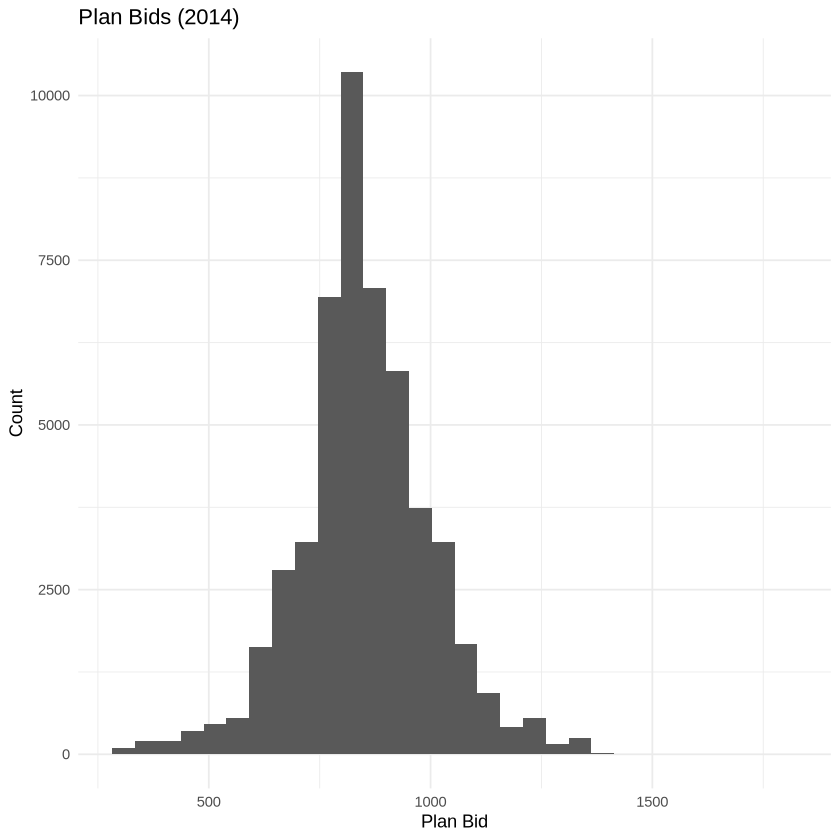

In [6]:
# Histogram for 2014
ggplot(filter(bids, year.x == 2014), aes(x = bid)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Plan Bids (2014)",
    x = "Plan Bid",
    y = "Count") +
  theme_minimal()


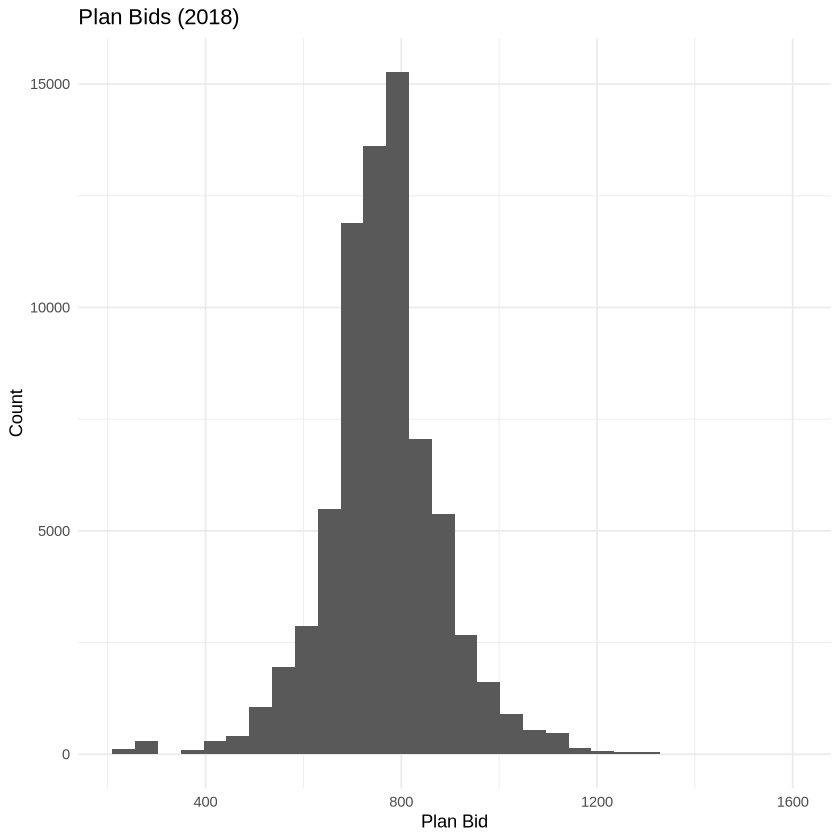

In [7]:
# Histogram for 2018
ggplot(filter(bids, year.x == 2018), aes(x = bid)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Plan Bids (2018)",
    x = "Plan Bid",
    y = "Count") +
  theme_minimal()


In [8]:
# Plot average HHI over time
# Compute HHI
county_hhi <- filtered_data %>%
  group_by(year.x, fips) %>%
  mutate(
    share = avg_enrollment / sum(avg_enrollment, na.rm = TRUE)
  ) %>%
  summarize(
    hhi = sum(share^2, na.rm = TRUE),
    .groups = "drop"
  )


In [9]:
# Average HHI by year
avg_hhi_year <- county_hhi %>%
  group_by(year.x) %>%
  summarize(
    avg_hhi = mean(hhi, na.rm = TRUE)
  )

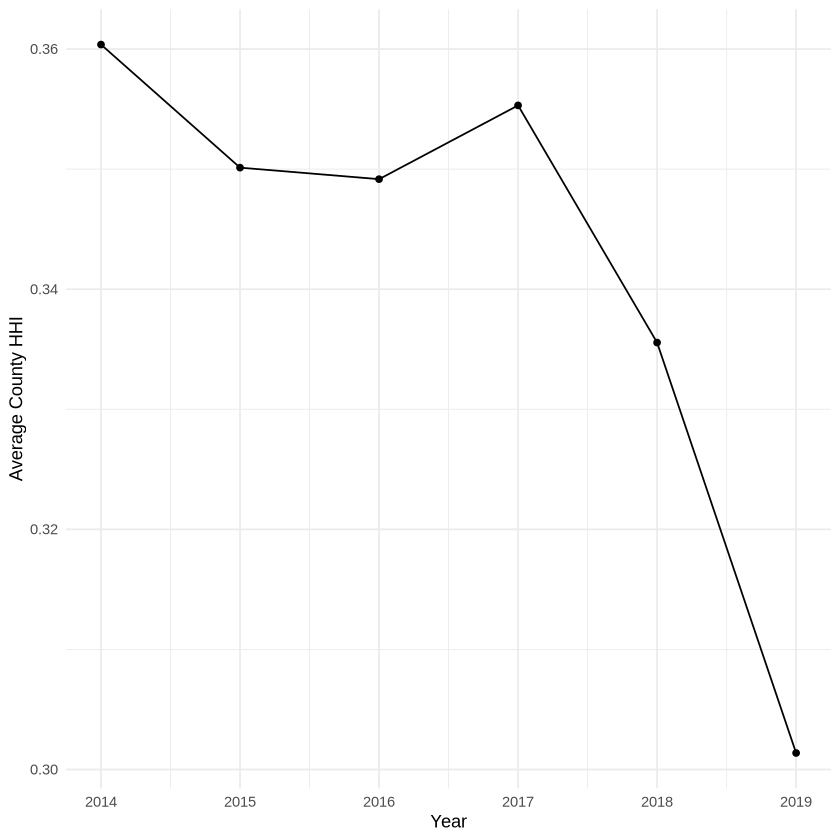

In [10]:
# Plot HHI average
ggplot(avg_hhi_year, aes(x = year.x, y = avg_hhi)) +
  geom_line() +
  geom_point() +
  labs(
    x = "Year",
    y = "Average County HHI") +
  theme_minimal()

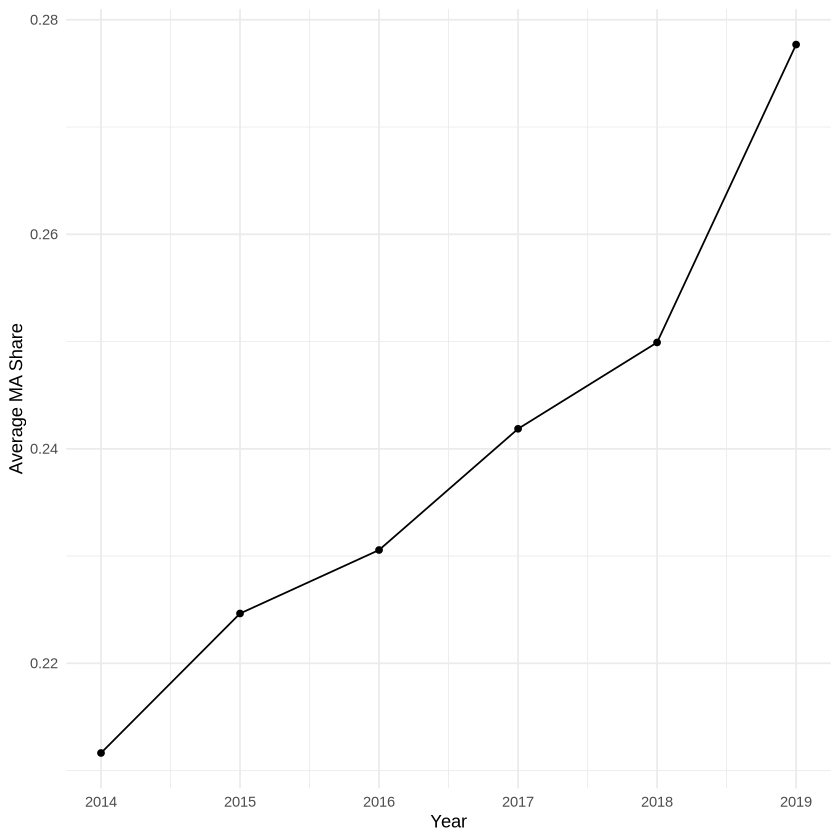

In [11]:
# Plot average share of Medicare Advantage
county_penetration <- filtered_data %>%
  group_by(year.x, fips) %>%
  summarize(
    ma_share = mean(avg_enrolled / avg_eligibles, na.rm = TRUE),
    .groups = "drop"
  )

# average by year
avg_penetration <- county_penetration %>%
  group_by(year.x) %>%
  summarize(
    avg_ma_share = mean(ma_share, na.rm = TRUE)
  )

# Plot of medicare advantage over time
ggplot(avg_penetration, aes(x = year.x, y = avg_ma_share)) +
  geom_line() +
  geom_point() +
  labs(
    x = "Year",
    y = "Average MA Share") +
  theme_minimal()


In [12]:
# defining competitive vs uncompetitive markets

In [13]:
# clean data
d18 <- data2018 %>%
  filter(
    snp != "Yes",        
    !grepl("^8", planid),
    plan_type != "PDP"
  )

In [14]:
county_totals <- d18 %>%
  group_by(fips) %>%
  summarise(
    total_ma_enrollment = sum(avg_enrollment),
    .groups = "drop"
  )
d18 <- d18 %>%
  left_join(county_totals, by = "fips") %>%
  mutate(
    market_share = avg_enrollment / total_ma_enrollment
  )
d18 %>%
  group_by(fips) %>%
  summarise(sum_shares = sum(market_share))

fips,sum_shares
<dbl>,<dbl>
1001,NA
1003,NA
1005,NA
1007,NA
1009,NA
1011,NA
1013,NA
1015,NA
1017,NA


In [15]:
hhi_2018 <- d18 %>%
  group_by(fips) %>%
  summarise(
    hhi = sum(market_share^2),
    .groups = "drop"
  )
d18 <- d18 %>%
  left_join(hhi_2018, by = "fips")


In [16]:
hhi_cuts <- quantile(d18$hhi, probs = c(0.33, 0.66), na.rm = TRUE)
hhi_cuts


33%      66% 
0.670138 1.000000

In [17]:
#5 
d18 <- d18 %>%
  mutate(
    competitive = case_when(
      hhi <= hhi_cuts[1] ~ 1,
      hhi >= hhi_cuts[2] ~ 0,
      TRUE ~ NA_real_
    )
  ) %>%
  filter(!is.na(competitive), !is.na(bid))


In [18]:
d18 %>%
  group_by(competitive) %>%
  summarise(
    mean_bid = mean(bid),
    n = n()
  )


competitive,mean_bid,n
<dbl>,<dbl>,<int>
0,792.5964,6
1,730.5261,4


In [78]:
# 6 
d18 <- d18 %>%
  mutate(
    ffs_quartile = ntile(avg_ffscost, 4)
  )
d18 %>%
  group_by(ffs_quartile, competitive) %>%
  summarise(
    mean_bid = mean(bid),
    n = n(),
    .groups = "drop"
  )


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `ffs_quartile = ntile(avg_ffscost, 4)`.
[1mCaused by error:[22m
[33m![39m object 'avg_ffscost' not found


In [79]:
# 7
m_ps <- matchit(
  competitive ~ factor(ffs_quartile),
  data = d18,
  method = "nearest",
  ratio = 1
)

ps_dat <- match.data(m_ps)

ate_ps <- with(
  ps_dat,
  mean(bid[competitive == 1]) - mean(bid[competitive == 0])
)


ERROR: Error in eval(predvars, data, env): object 'competitive' not found


In [80]:
d18 <- d18 %>%
  left_join(county_totals, by = "fips") %>%
  mutate(
    market_share = avg_enrollment / total_ma_enrollment
  )


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `market_share = avg_enrollment/total_ma_enrollment`.
[1mCaused by error:[22m
[33m![39m object 'total_ma_enrollment' not found


In [81]:
ps_mod <- glm(
  competitive ~ factor(ffs_quartile),
  data = d18,
  family = binomial
)

d18 <- d18 %>%
  mutate(
    ps = predict(ps_mod, type = "response"),
    w = ifelse(competitive == 1, 1 / ps, 1 / (1 - ps))
  )

ate_ipw <- with(
  d18,
  weighted.mean(bid[competitive == 1], w[competitive == 1]) -
    weighted.mean(bid[competitive == 0], w[competitive == 0])
)


ERROR: Error in eval(predvars, data, env): object 'competitive' not found


In [82]:
reg <- lm(
  bid ~ competitive * factor(ffs_quartile),
  data = d18
)

summary(reg)


ERROR: Error in eval(predvars, data, env): object 'competitive' not found


In [83]:
tibble(
  Method = c(
    "NN Matching (PS)",
    "NN Matching (Mahalanobis)",
    "IPW",
    "Linear Regression"
  ),
  ATE = c(
    ate_ps,
    ate_mah,
    ate_ipw,
    coef(reg)["competitive"]
  )
)


ERROR: Error: object 'ate_ps' not found
